# Solving Laplace's Equation
George Poole grp39@cam.ac.uk

In two-dimensional Cartesian coordinates, Laplace's equation is

$$\nabla^2\phi=0$$

$$\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=0~~~.$$

To solve this numerically, we need to discretise $\phi(x,y)$ and obtain a difference equation. Considering Taylor series expansions, we have

$$\phi(x\pm\Delta x,y)=\phi(x,y)\pm\Delta x\frac{\partial\phi}{\partial x}+\frac{\Delta x^2}{2}\frac{\partial^2\phi}{\partial x^2}\pm\frac{\Delta x^3}{6}\frac{\partial^3\phi}{\partial x^3}+O(\Delta x^4)$$

$$\phi(x,y\pm\Delta y)=\phi(x,y)\pm\Delta y\frac{\partial\phi}{\partial y}+\frac{\Delta y^2}{2}\frac{\partial^2\phi}{\partial y^2}\pm\frac{\Delta y^3}{6}\frac{\partial^3\phi}{\partial y^3}+O(\Delta y^4)~~~.$$

Writing the discretised version as $\Phi_{i\pm1,j}=\phi(x\pm\Delta x,y)$ and $\Phi_{i,j\pm1}=\phi(x,y\pm\Delta y)$, we then rearrange to get

$$\frac{\partial^2\phi}{\partial x^2}=\frac{\Phi_{i+1,j}-2\Phi_{i,j}+\Phi_{i-1,j}}{\Delta x^2}$$

$$\frac{\partial^2\phi}{\partial y^2}=\frac{\Phi_{i,j+1}-2\Phi_{i,j}+\Phi_{i,j-1}}{\Delta y^2}~~~.$$

Taking $\Delta x=\Delta y$ and combining these then yields

$$4\Phi_{i,j}-\Phi_{i+1,j}-\Phi_{i-1,j}-\Phi_{i,j+1}-\Phi_{i,j-1}=0~~~.~~~(*)$$

We seek to solve Laplace's equation on the rectangualr domain defined by $x_1\leq x\leq x_2, y_1\leq y\leq y_2$, which is discretised in small intervals $\Delta x=\frac{x_2-x_1}{M}$, $\Delta y=\frac{y_2-y_1}{N}$ for positive integers $N$, $M$. Given the Dirichlet boundary conditions 

$$\Phi_{0,j}=\phi(x_1,y)=f_1(y)$$

$$\Phi_{M,j}=\phi(x_2,y)=f_2(y)$$

$$\Phi_{i,0}=\phi(x,y_1)=g_1(x)$$

$$\Phi_{i,N}=\phi(x,y_2)=g_2(x)$$

we are essentially left with $(M-1)(N-1)$ simultaneous equations to solve for $\Phi_{i,j}=\phi(i\Delta x,j\Delta y)$ with $i\in\{1,2,\dots M-1\}$ and $j\in\{1,2,\dots N-1\}$.

As matrix equation, this reads

$$\begin{pmatrix}
4 & \dots & \\
\vdots & \ddots & \vdots \\
 & \dots & 4\\
\end{pmatrix}
\begin{pmatrix}
\Phi_{1,1}\\
\vdots\\
\Phi_{M-1,N-1}\\
\end{pmatrix}
=
\begin{pmatrix}
\Phi_{1,0}+\Phi_{0,1}\\
\vdots\\
\Phi_{M,N-1}+\Phi_{M-1,N}\\
\end{pmatrix}
$$

where the matrix's diagonal elements are all $4$ and non-diagonal elements are $0$, $+1$ or $-1$ as determined by $(*)$.

As an example, let's consider the domain $0\leq x\leq1, 0\leq y\leq1$ and boundary conditions

$$\Phi_{0,j}=\phi(0,y)=0$$

$$\Phi_{N,j}=\phi(1,y)=0$$

$$\Phi_{i,0}=\phi(x,0)=0$$

$$\Phi_{i,N}=\phi(x,1)=\sin(\pi x)$$

where we have taken $\Delta x=\Delta y$ and hence $M=N$. The Python program below solves the resulting $(N-1)^2$ simultaneous equations.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

a,b=1,1
Delta=0.1
M,N=int(a/Delta),int(b/Delta)
M_=M-1
N_=N-1

phi=np.array([[0.0]*(M+1)]*(N+1))

# setting the boundary values of the phi matrix
for i in range(0,N+1):
    for j in range(0,N+1):
        if i==0:
            phi[i][j]=0
        if i==N:
            phi[i][j]=0
        if j==0:
            phi[i][j]=0
        if j==N:
            phi[i][j]=np.sin(np.pi*Delta*i)
        
matrix=np.array([[0.0]*M_*N_]*M_*N_)
rhs=np.array([0.0]*M_*N_)

# evaluating the matrix components
for i in range(0,M_*N_):
    for j in range(0,M_*N_):
        if j==i:
            matrix[i][j]=4
        for k in range(0,N_):
            if k*N_<=i<(k+1)*N_:
                if j==i+1 and k*N_<=j<(k+1)*N_:
                    matrix[i][j]=-1
                if j==i-1 and k*N_<=j<(k+1)*N_:
                    matrix[i][j]=-1
                if j==i+N_ and j<(k+2)*N_:
                    matrix[i][j]=-1
                if j==i-N_ and j<(k+2)*N_:
                    matrix[i][j]=-1
                    
# evaluating the vector components, k is a counter
rhs=np.array([0.0]*M_*N_)
k=[0]*N_
for i in range(0,len(rhs)):
    if i//N_==0:
        k[0]=k[0]+1
        rhs[i]=phi[0][k[0]]
        if k[0]-1==0:
            rhs[i]=phi[0][k[0]]+phi[i][k[0]-1]
        if k[0]+1==N:
            rhs[i]=phi[0][k[0]]+phi[i][k[0]+1]
    if i//N_==N_-1:
        k[N_-1]=k[N_-1]+1
        rhs[i]=phi[N][k[N_-1]]
        if k[N_-1]-1==0:
            rhs[i]=phi[N][k[N_-1]]+phi[N_][k[N_-1]-1]
        if k[N_-1]+1==N:
            rhs[i]=phi[N][k[N_-1]]+phi[N_][k[N_-1]+1]
    if i//N_!=0 and i//N_!=N_-1:
        k[i//N_]=k[i//N_]+1
        if k[i//N_]-1==0:
            rhs[i]=phi[i//N_+1][k[i//N_]-1]
        if k[i//N_]+1==N:
            rhs[i]=phi[i//N_+1][k[i//N_]+1]

# solving the matrix equation
sol=np.linalg.solve(matrix, rhs)

# setting the inner values of the phi matrix
counter=0
for i in range(1,N):
    for j in range(1,N):
        counter=counter+1
        phi[i][j]=sol[counter-1]

Of course, more sophisticated ways of solving partial differential equations numerically do exist. This simple method's 'computational cost' is $O(MN)$, since there are $(M-1)(N-1)$ simultaneous equations to solve.

To be obtain the exact solution, consider a separable solution $\phi(x,y)=X(x)Y(y)$. Then

$$\frac{X''(x)}{X}+\frac{Y''(y)}{Y}=0$$

and we must have $X''/X=-Y''/Y=\lambda^2$ for constant $\lambda$. We then get

$$X_\lambda(x)=A_\lambda e^{\lambda x}+B_\lambda e^{-\lambda x}~~~\text{for}~~~\lambda^2>0$$

$$X_\mu(x)=A_\mu\sin(\mu x)+B_\mu\cos(\mu x)~~~\text{for}~~~\lambda^2=-\mu^2<0$$

$$X_\lambda(x)=A_\lambda x+B_\lambda~~~\text{for}~~~\lambda=0~~~.$$

Since $\phi(0,y)=0\implies X(0)=0$, the constants of integration must satisfy

$$A_\lambda=-B_\lambda~~~\text{for}~~~\lambda^2>0$$

$$B_\mu=0~~~\text{for}~~~\lambda^2=-\mu^2<0$$

$$B_\lambda=0~~~\text{for}~~~\lambda=0$$.

Also, the boundary condition $\phi(1,y)=0\implies X(1)=0$, so we further find that

$$A_\lambda=B_\lambda=0~~~\text{for}~~~\lambda^2>0$$

$$\mu=m\pi~~~\text{for}~~~\lambda^2=-\mu^2<0$$

$$A_\lambda=0~~~\text{for}~~~\lambda=0~~~.$$

Hence we can write $X(x)=X_m(x)=\mathcal{X}_m\sin(m\pi x)$, where $m\in\mathbb{Z}$.

The procedure for $Y(y)$ follows the same steps, but we already know that we need $\lambda^2<0$. We therefore have have 

$$Y_\mu(y)=C_\mu e^{\mu y}+D_\mu e^{-\mu y}~~~\text{for}~~~\lambda^2=-\mu^2<0$$

and $\phi(x,0)=0\implies Y(0)=0$ which requires

$$C_\mu=-D_\mu~~~.$$

The final boundary condition states that $X(x)Y(1)=\sin(\pi x)$, which requires $\sin(\pi x)/X(x)$ to be constant. This can only be possible if $X(x)=X_1(x)=\mathcal{X}_1\sin(\pi x)$ and therefore the only permitted value of $\lambda^2$ is

$$\lambda^2=-\pi^2$$

which restricts the functions to 

$$X(x)=\mathcal{X}_1\sin(\pi x)$$

$$Y(x)=C_\pi(e^{\pi y}-e^{-\pi y})=\mathcal{Y}_1\sinh(\pi y)$$

From the boundary condition we get $\mathcal{X}_1\mathcal{Y}_1\sinh(\pi)=1$ and hence our solution to Laplace's equation is

$$\phi(x,y)=\frac{\sin(\pi x)\sinh(\pi y)}{\sinh(\pi)}$$

which can easily be verified by differentiation.

The plot below compares the exact and numerical solution with a 'heat map' of absolute error.

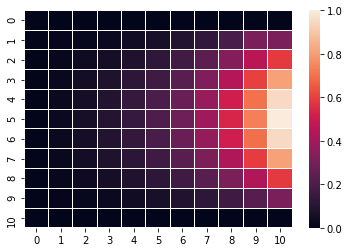

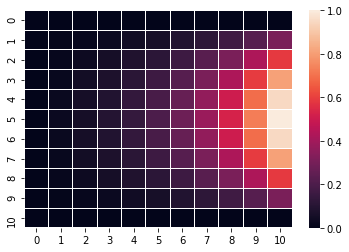

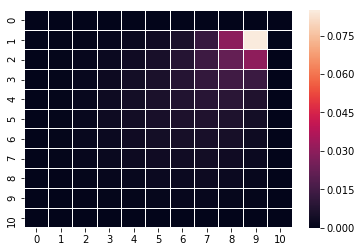

In [3]:
exact_phi=np.array([[0.0]*(M+1)]*(N+1))

# calculating the exact values of the phi matrix
for i in range(0,N+1):
    for j in range(0,N+1):
        exact_phi[i][j]=np.sin(np.pi*Delta*i)*np.sinh(np.pi*Delta*j)/np.sinh(np.pi)

error=np.abs(exact_phi-phi)

plt.figure(1)
fig1=sns.heatmap(phi, linewidth=0.01)
plt.figure(2)
fig2=sns.heatmap(exact_phi, linewidth=0.01)
plt.figure(3)
fig3=sns.heatmap(error, linewidth=0.01)

plt.show()

## Related Courses

* Computational Practicals, Part IB NST Mathematics